In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df= pd.read_csv("Breast_Cancer.csv")
df.sample(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
3051,48,Black,Single,T2,N1,IIB,Moderately differentiated,2,Regional,25,Positive,Positive,11,2,101,Alive
3609,59,White,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,40,Positive,Positive,26,1,45,Alive
134,55,White,Single,T2,N2,IIIA,Poorly differentiated,3,Regional,45,Positive,Negative,8,7,41,Dead
2817,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Negative,14,1,84,Alive
3607,58,White,Divorced,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,20,2,72,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

# preprocessing

In [5]:
df.drop('Race', axis='columns', inplace=True)

In [6]:
df.drop('Marital Status', axis='columns', inplace=True)

In [7]:
df.drop('Survival Months', axis='columns', inplace=True)

In [8]:
df.dtypes

Age                        int64
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Status                    object
dtype: object

In [9]:
df.Grade.unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [10]:
df['Grade'] = df['Grade'].str.replace("anaplastic; Grade IV",'4')

In [11]:
df.dtypes

Age                        int64
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Status                    object
dtype: object

In [12]:
def print_unique_col_value(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [13]:
print_unique_col_value(df)

T Stage :['T1' 'T2' 'T3' 'T4']
N Stage:['N1' 'N2' 'N3']
6th Stage:['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate:['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade:['3' '2' '1' ' 4']
A Stage:['Regional' 'Distant']
Estrogen Status:['Positive' 'Negative']
Progesterone Status:['Positive' 'Negative']
Status:['Alive' 'Dead']


In [14]:
df['A Stage'].replace({'Regional':1, 'Distant':0},inplace= True)

In [15]:
df['Estrogen Status'].replace({'Positive':1, 'Negative':0},inplace= True)

In [16]:
df['Progesterone Status'].replace({'Positive':1, 'Negative':0},inplace= True)

In [17]:
df['Status'].replace({'Alive':1, 'Dead':0},inplace= True)

In [18]:
print_unique_col_value(df)

T Stage :['T1' 'T2' 'T3' 'T4']
N Stage:['N1' 'N2' 'N3']
6th Stage:['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate:['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade:['3' '2' '1' ' 4']


In [19]:
df.rename(columns={"T Stage ": "T Stage"}, inplace=True)

In [20]:
df1=pd.get_dummies(data=df,columns=['T Stage','N Stage','6th Stage','differentiate','Grade'])

In [21]:
df1.columns

Index(['Age', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Status', 'T Stage_T1', 'T Stage_T2',
       'T Stage_T3', 'T Stage_T4', 'N Stage_N1', 'N Stage_N2', 'N Stage_N3',
       '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB',
       '6th Stage_IIIC', 'differentiate_Moderately differentiated',
       'differentiate_Poorly differentiated', 'differentiate_Undifferentiated',
       'differentiate_Well differentiated', 'Grade_ 4', 'Grade_1', 'Grade_2',
       'Grade_3'],
      dtype='object')

In [22]:
df1.sample(5)

,Age,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status,T Stage_T1,T Stage_T2,...,6th Stage_IIIB,6th Stage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ 4,Grade_1,Grade_2,Grade_3
584,61,1,14,1,1,29,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3498,52,1,15,1,1,17,4,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2201,64,1,14,1,1,17,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3774,49,1,30,1,1,14,2,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1403,63,1,20,1,1,13,3,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
df1.dtypes

Age                                        int64
A Stage                                    int64
Tumor Size                                 int64
Estrogen Status                            int64
Progesterone Status                        int64
Regional Node Examined                     int64
Reginol Node Positive                      int64
Status                                     int64
T Stage_T1                                 uint8
T Stage_T2                                 uint8
T Stage_T3                                 uint8
T Stage_T4                                 uint8
N Stage_N1                                 uint8
N Stage_N2                                 uint8
N Stage_N3                                 uint8
6th Stage_IIA                              uint8
6th Stage_IIB                              uint8
6th Stage_IIIA                             uint8
6th Stage_IIIB                             uint8
6th Stage_IIIC                             uint8
differentiate_Modera

In [24]:
x= df1.drop('Status',axis='columns')
y= df1['Status']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=5)

In [26]:
x_train.shape

(3219, 27)

In [27]:
x_test.shape

(805, 27)

In [28]:
len(x_train.columns)

27

In [29]:
x_train[:10]

,Age,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,T Stage_T1,T Stage_T2,T Stage_T3,...,6th Stage_IIIB,6th Stage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ 4,Grade_1,Grade_2,Grade_3
626,53,1,18,1,1,17,8,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1903,43,1,11,1,1,25,2,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1517,55,1,10,1,1,14,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1015,32,1,30,0,0,3,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1433,47,1,28,1,1,23,16,0,1,0,...,0,1,1,0,0,0,0,0,1,0
1394,60,1,27,1,1,10,4,0,1,0,...,0,0,0,1,0,0,0,0,0,1
496,57,1,17,1,1,23,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2241,46,1,55,1,1,16,16,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1006,44,1,21,1,1,5,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
878,50,1,60,1,1,10,2,0,0,1,...,0,0,0,1,0,0,0,0,0,1


# ## Creating Model

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
model = keras.Sequential([
    
    keras.layers.Dense(20, input_shape=(27,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [33]:
model.fit(x_train,y_train, epochs=150)

Epoch 1/150
101/101 [==============================] - 1s 2ms/step - loss: 1.9636 - accuracy: 0.6325
Epoch 2/150
101/101 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.7937
Epoch 3/150
101/101 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8406
Epoch 4/150
101/101 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8500
Epoch 5/150
101/101 [==============================] - 0s 1ms/step - loss: 0.3934 - accuracy: 0.8515
Epoch 6/150
101/101 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8559
Epoch 7/150
101/101 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.8518
Epoch 8/150
101/101 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8537
Epoch 9/150
101/101 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8546
Epoch 10/150
101/101 [==============================] - 0s 1ms/step - loss: 0.3816 - accura

In [34]:
model.evaluate(x_test,y_test)

26/26 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8497


[0.39028117060661316, 0.8496894240379333]

In [35]:
yp= model.predict(x_test)
yp[:5]

26/26 [==============================] - 0s 1ms/step


array([[0.44489378],
       [0.8649357 ],
       [0.89188033],
       [0.5298422 ],
       [0.9172312 ]], dtype=float32)

In [36]:
y_test[:10]

1716    0
2383    0
3800    1
3192    1
228     1
1998    1
3135    0
3689    1
3862    1
2733    1
Name: Status, dtype: int64

In [37]:
y_pred= []
for element in yp:
    if element> 0.5:
        y_pred.append(1)
        
    else:
        y_pred.append(0)

In [38]:
y_pred[:10]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.12      0.20       129
           1       0.85      0.99      0.92       676

    accuracy                           0.85       805
   macro avg       0.77      0.55      0.56       805
weighted avg       0.83      0.85      0.80       805



Text(95.72222222222221, 0.5, 'Truth')

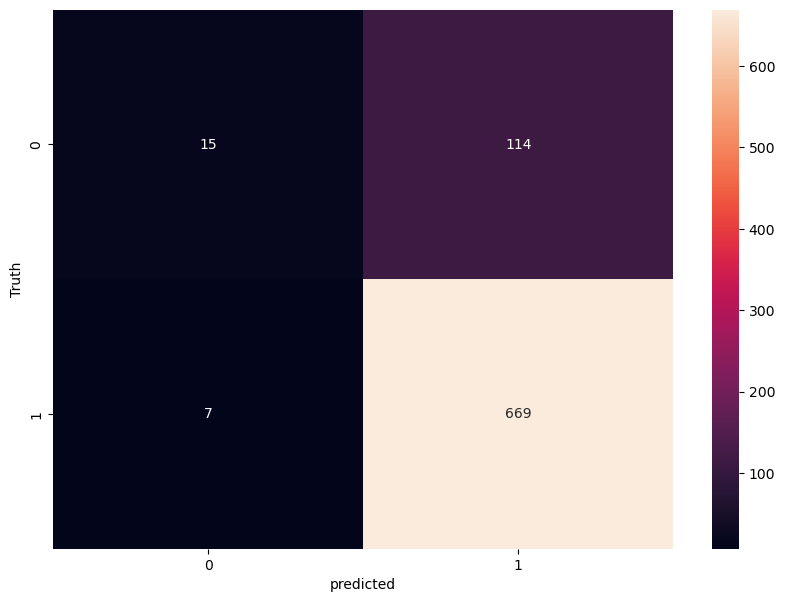

In [40]:
import seaborn as sn
cm= tf.math.confusion_matrix(labels= y_test, predictions= y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')